## Proveedores mejor valorados


In [1]:

from  random import randint
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df0 = pd.read_csv ('DATASET_BASE.csv')

In [3]:
df0.head()

,Usuario,Categorias,Numero_articulos,Fecha,Precio,Valoracion,Comentarios,Proveedores,Ciudad
0,1,Cocina,8,Primavera,264.50,1.3,no cumple las expectativas,Flora,Gijón
1,1,Hogar,6,Primavera,431.16,0.9,no cumple las expectativas,Henkel,Gijón
2,1,Cocina,2,Verano,374.87,4.0,justo lo que esperaba,Bimbo,Gijón
3,1,Hogar,2,Primavera,55.15,2.1,el paquete llego en mal estado,Colgate - palmolive,Gijón
4,1,Baño,2,Verano,18.32,4.7,muy bueno!,KH7,Gijón


In [4]:
df1= df0.copy()

In [5]:
df1.head()

,Usuario,Categorias,Numero_articulos,Fecha,Precio,Valoracion,Comentarios,Proveedores,Ciudad
0,1,Cocina,8,Primavera,264.50,1.3,no cumple las expectativas,Flora,Gijón
1,1,Hogar,6,Primavera,431.16,0.9,no cumple las expectativas,Henkel,Gijón
2,1,Cocina,2,Verano,374.87,4.0,justo lo que esperaba,Bimbo,Gijón
3,1,Hogar,2,Primavera,55.15,2.1,el paquete llego en mal estado,Colgate - palmolive,Gijón
4,1,Baño,2,Verano,18.32,4.7,muy bueno!,KH7,Gijón


In [6]:
df_valencia = df1[df1['Ciudad']=='Valencia']

In [7]:
df_valencia.head(3)

,Usuario,Categorias,Numero_articulos,Fecha,Precio,Valoracion,Comentarios,Proveedores,Ciudad
290,17,Baño,4,Primavera,23.29,4.4,justo lo que esperaba,KH7,Valencia
291,17,Cocina,8,Primavera,465.24,0.6,muy malo,Oscar mayer,Valencia
292,17,Juguetes,10,Primavera,462.10,1.4,no llego el producto,Lego,Valencia


In [25]:
#df_valencia.groupby(['Proveedores']).sum()

In [8]:
# Extraemos los atributos de interes para sacar proveedores mas vendidos de valencia 
df_atributos = df_valencia [['Fecha', 'Valoracion', 'Proveedores']]

In [9]:
df_atributos.head()

,Fecha,Valoracion,Proveedores
290,Primavera,4.4,KH7
291,Primavera,0.6,Oscar mayer
292,Primavera,1.4,Lego
293,Otoño,4.9,Pavco
294,Otoño,0.8,3M


In [10]:
df_top_valorados= df_atributos.groupby (['Proveedores']).mean().sort_values(by= 'Valoracion', ascending=False)

Text(0, 0.5, 'Valoracion ')

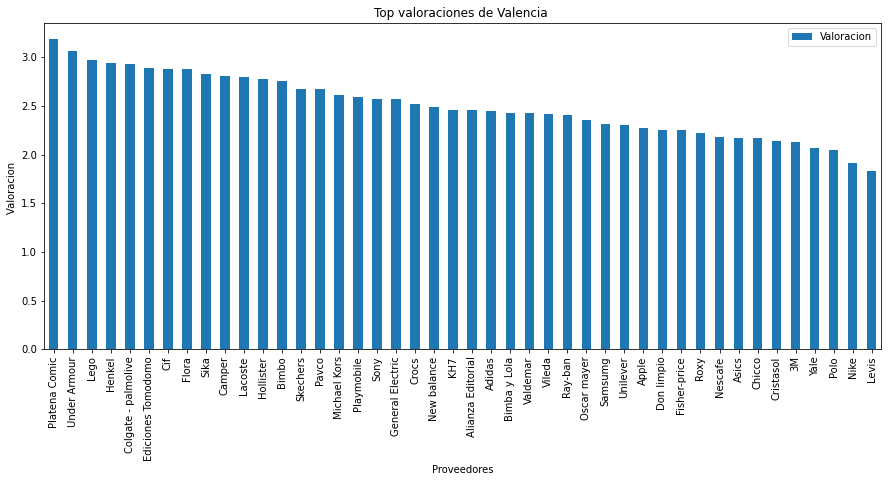

In [11]:
df_top_valorados.plot.bar(figsize = (15,6))
plt.title('Top valoraciones de Valencia ')
plt.xlabel('Proveedores')
plt.ylabel('Valoracion ')

In [35]:
# Tomamos la desicion de seleccionar los 5 mejores valorados

In [13]:
df_top_valorados.head(5)

,Valoracion
Proveedores,
Platena Comic,3.191667
Under Armour,3.061111
Lego,2.966667
Henkel,2.941176
Colgate - palmolive,2.933333


In [14]:
df_top5= df_top_valorados.iloc[:5]

Text(0, 0.5, 'Valoracion ')

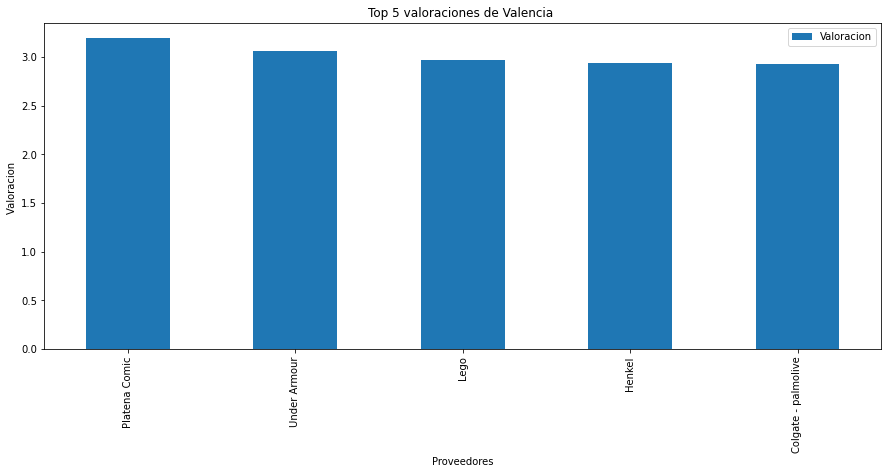

In [15]:
df_top5.plot.bar(figsize = (15,6))
plt.title('Top 5 valoraciones de Valencia ')
plt.xlabel('Proveedores')
plt.ylabel('Valoracion ')

In [44]:
#pd.pivot_table(data=df5, index= ['Ciudad'], values= ['Precio'], columns= 'Fecha', aggfunc=np.sum)

In [16]:
df_atributos.head(3)

,Fecha,Valoracion,Proveedores
290,Primavera,4.4,KH7
291,Primavera,0.6,Oscar mayer
292,Primavera,1.4,Lego


In [17]:
df_top5.head(3)

,Valoracion
Proveedores,
Platena Comic,3.191667
Under Armour,3.061111
Lego,2.966667


In [18]:
print (df_top5.index.to_list())


['Platena Comic', 'Under Armour', 'Lego', 'Henkel', 'Colgate - palmolive']


In [19]:
df_top5 = df_atributos [ 
             (df_atributos['Proveedores']=='Platena Comic')
             | (df_atributos['Proveedores']=='Under Armour')
             | (df_atributos['Proveedores']=='Lego')
             | (df_atributos['Proveedores']=='Henkel')
             | (df_atributos['Proveedores']=='Colgate - palmolive')
            
             ]

In [20]:
df_top5.head(3)

,Fecha,Valoracion,Proveedores
292,Primavera,1.4,Lego
306,Verano,0.4,Henkel
308,Otoño,3.3,Platena Comic


In [ ]:
#pd.pivot_table(data=df5, index= ['Ciudad'], values= ['Precio'], columns= 'Fecha', aggfunc=np.sum)

In [21]:
df_top5_fechas= pd.pivot_table(data=df_top5, index= ['Proveedores'], values= ['Valoracion'], columns= 'Fecha', aggfunc=np.sum)

Text(0, 0.5, 'Valoracion Promedio')

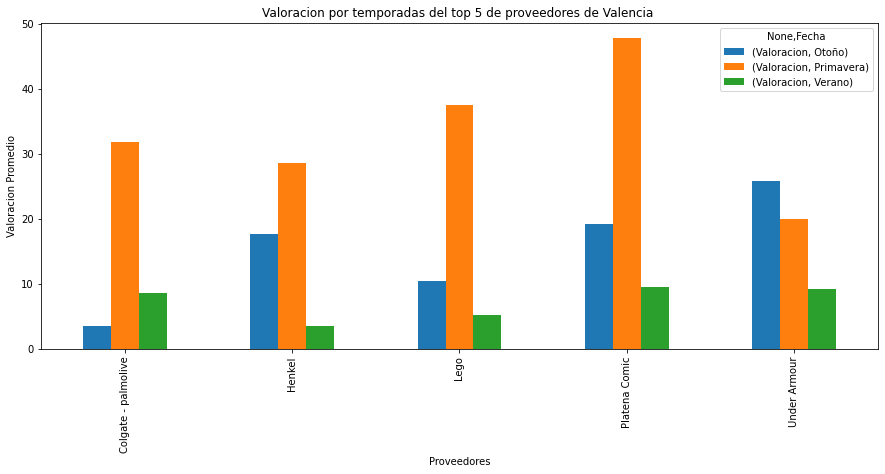

In [23]:
df_top5_fechas.plot.bar(figsize =(15,6))
plt.title('Valoracion por temporadas del top 5 de proveedores de Valencia ')
plt.xlabel('Proveedores')
plt.ylabel('Valoracion Promedio')

Text(0, 0.5, 'Ventas segregadas por temporada')

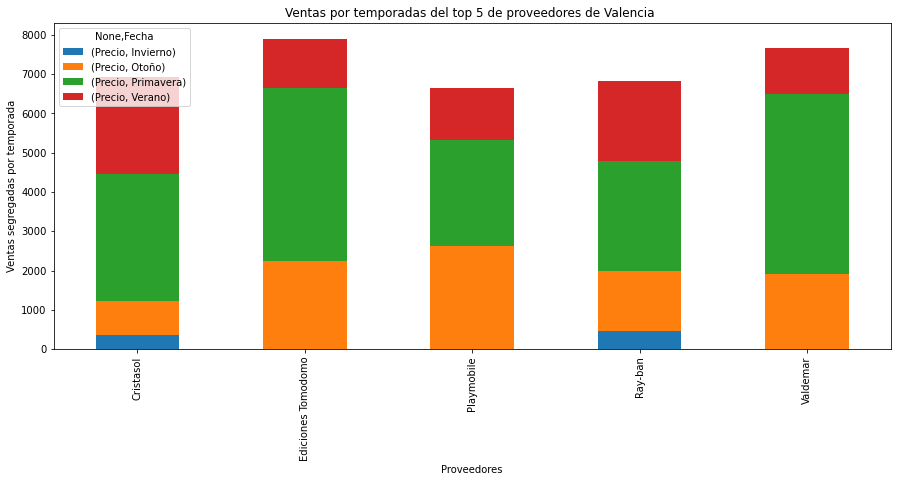

In [61]:
df_top5_fechas.plot.bar(stacked = True, figsize =(15,6))
plt.title('Ventas por temporadas del top 5 de proveedores de Valencia ')
plt.xlabel('Proveedores')
plt.ylabel('Ventas segregadas por temporada')